<h1><c>  Brain Stroke Disease Prediction </c> </h1>

## Importing Libraries

In [1]:
#pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from math import sqrt
import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTETomek
import seaborn as sns
from collections import Counter
import warnings
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from numpy import arange
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

## Reading the data

In [3]:
warnings.filterwarnings('ignore')
url = "Stroke_analysis.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,pid,age,gender,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
0,1,PID2829938,61,Male,0,-1,124,80,77,0,0,22,200,-1,0
1,2,PID1833441,75,Male,0,-1,123,82,79,0,0,20,208,-1,0
2,3,PID8745027,73,Male,0,-1,121,83,83,0,0,20,208,-1,0
3,4,PID4568062,63,Female,0,-1,120,85,105,0,0,20,210,-1,0
4,5,PID3855176,23,Male,0,-1,126,81,89,0,0,22,201,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,4794,PID11726,67,Male,13,6,180,83,198,1,2,39,219,3,2
4794,4795,PID11727,67,Female,20,3,180,88,188,0,2,22,187,1,2
4795,4796,PID11728,65,Male,6,4,126,111,227,0,3,23,233,3,2
4796,4797,PID11729,64,Male,19,5,126,82,262,2,2,28,244,1,2


# Dropping unnecessary columns

In [4]:
df = df.drop(["Unnamed: 0"], axis = 1)
df = df.drop(["pid"], axis = 1)
df = df.rename(columns={"nhiss":"NIHSS_Score", "mrs":"mRS", "distolic":"diastolic"})

# EDA

In [5]:
df

,age,gender,NIHSS_Score,mRS,systolic,diastolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
0,61,Male,0,-1,124,80,77,0,0,22,200,-1,0
1,75,Male,0,-1,123,82,79,0,0,20,208,-1,0
2,73,Male,0,-1,121,83,83,0,0,20,208,-1,0
3,63,Female,0,-1,120,85,105,0,0,20,210,-1,0
4,23,Male,0,-1,126,81,89,0,0,22,201,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,67,Male,13,6,180,83,198,1,2,39,219,3,2
4794,67,Female,20,3,180,88,188,0,2,22,187,1,2
4795,65,Male,6,4,126,111,227,0,3,23,233,3,2
4796,64,Male,19,5,126,82,262,2,2,28,244,1,2


In [6]:
#Printing the shape of the dataset
df.shape

(4798, 13)

In [7]:
#Describing the dataset
df.describe()

,age,NIHSS_Score,mRS,systolic,diastolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
count,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000
mean,47.116090,18.124427,3.674239,153.091705,103.655065,225.846186,1.362026,0.884744,33.739475,217.531055,1.988745,1.879325
std,23.690637,11.274141,1.872073,24.927477,18.344127,56.119071,1.106405,0.903432,6.231687,20.268753,0.973207,0.486878
min,1.000000,0.000000,-1.000000,100.000000,59.000000,70.000000,0.000000,0.000000,18.000000,160.000000,-1.000000,0.000000
25%,28.000000,10.000000,2.000000,132.000000,91.000000,203.000000,0.000000,0.000000,29.000000,205.000000,1.000000,2.000000
50%,49.000000,18.000000,4.000000,154.000000,104.000000,239.000000,1.000000,1.000000,34.000000,219.000000,2.000000,2.000000
75%,66.000000,25.000000,5.000000,175.000000,118.000000,268.000000,2.000000,2.000000,38.000000,234.000000,3.000000,2.000000
max,90.000000,45.000000,6.000000,195.000000,135.000000,295.000000,3.000000,3.000000,45.000000,253.000000,3.000000,3.000000


In [8]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4798 non-null   int64 
 1   gender       4798 non-null   object
 2   NIHSS_Score  4798 non-null   int64 
 3   mRS          4798 non-null   int64 
 4   systolic     4798 non-null   int64 
 5   diastolic    4798 non-null   int64 
 6   glucose      4798 non-null   int64 
 7   paralysis    4798 non-null   int64 
 8   smoking      4798 non-null   int64 
 9   bmi          4798 non-null   int64 
 10  cholestrol   4798 non-null   int64 
 11  tos          4798 non-null   int64 
 12  risk         4798 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 487.4+ KB


<AxesSubplot: ylabel='risk'>

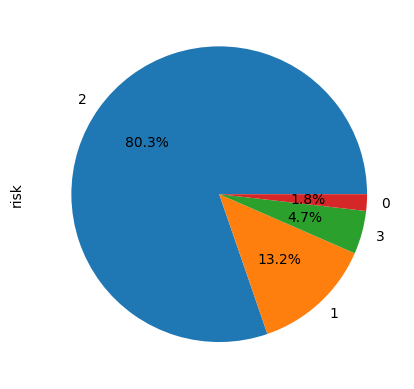

In [9]:
#Getting the ditribution of the target variable risk
df.risk.value_counts().plot(kind='pie',autopct='%1.1f%%')

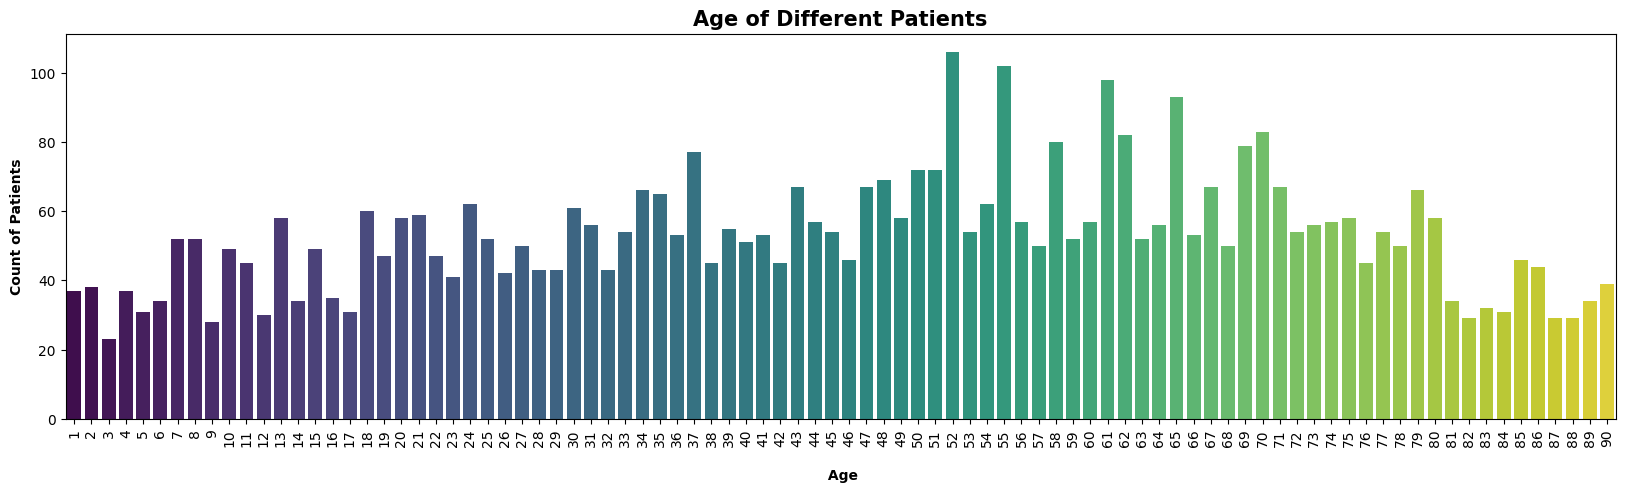

In [10]:
#Getting distribution on the basis of age
fig, ax=plt.subplots(figsize=(20,5))
sns.countplot(x=df.age, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('\n Age', fontsize=10, fontweight='bold')
plt.ylabel('Count of Patients', fontsize=10, fontweight='bold')
plt.title('Age of Different Patients', fontweight = 'bold', fontsize='15')
plt.show()

<AxesSubplot: xlabel='age', ylabel='Count'>

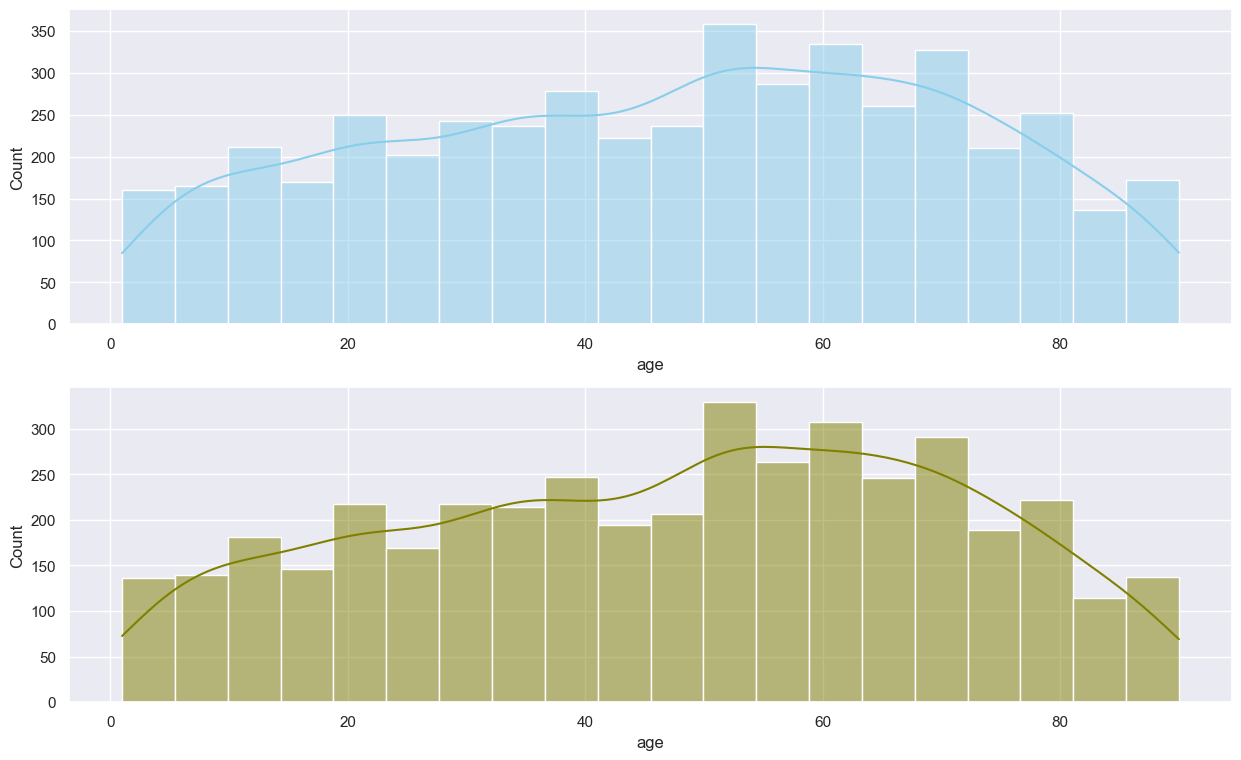

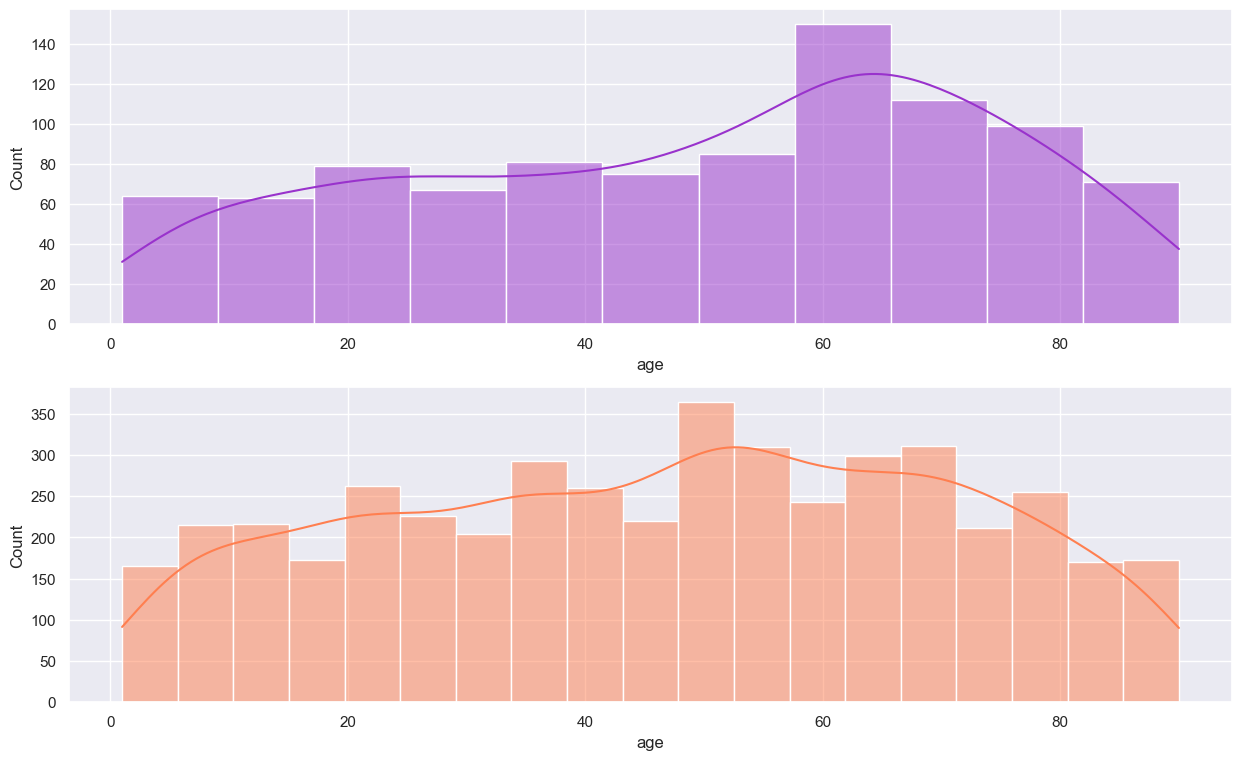

In [11]:
#Getting the ages where stroke severity is higher
stroke_0 = df[~(df['risk'] == 0)]
stroke_1 = df[~(df['risk'] == 1)]
stroke_2 = df[~(df['risk'] == 2)]
stroke_3 = df[~(df['risk'] == 3)]
sns.set(style="darkgrid")
fig3, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 9))
fig4, (ax3, ax4) = plt.subplots(2,1, figsize=(15, 9))

sns.histplot(x=stroke_0['age'], kde=True, color="skyblue", ax=ax1)
sns.histplot(x=stroke_1['age'], kde=True, color="olive", ax=ax2)
sns.histplot(x=stroke_2['age'], kde=True, color="darkorchid", ax=ax3)
sns.histplot(x=stroke_3['age'], kde=True, color="coral", ax=ax4)

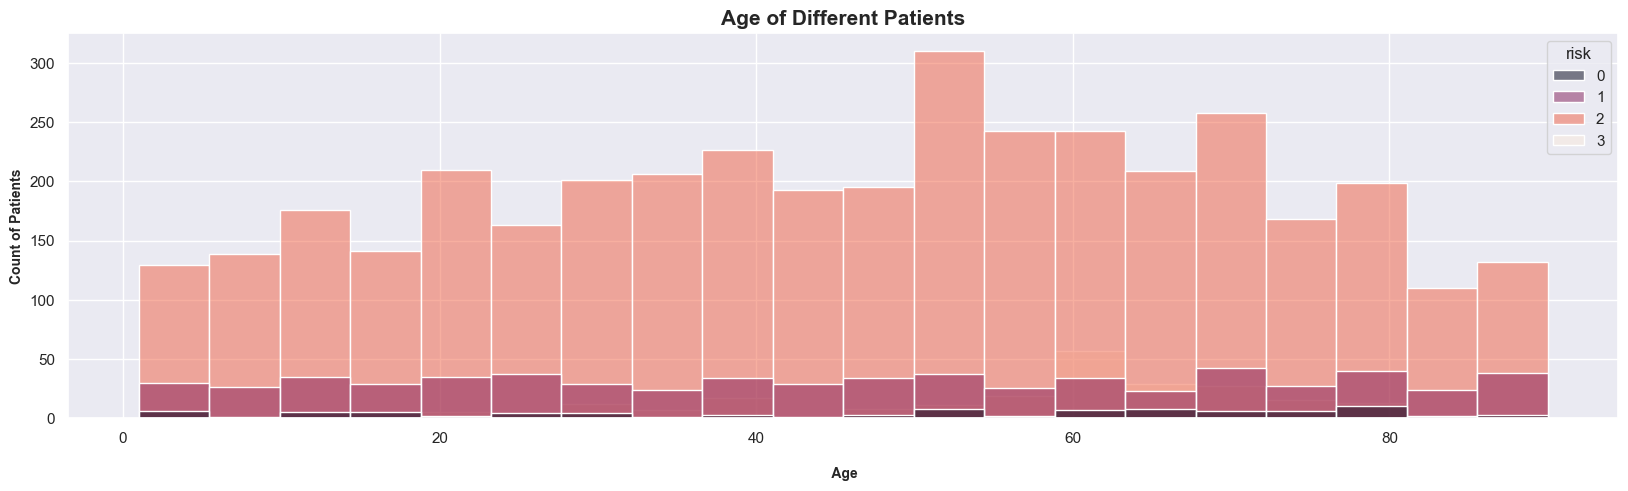

In [12]:
#Getting the severity of strokes age-wise
fig4, ax=plt.subplots(figsize=(20,5))
legend = ['No Stroke', 'Stroke']
sns.set(style="darkgrid")
sns.histplot(x=df['age'], hue=df.risk, palette='rocket')
plt.xlabel('\n Age', fontsize=10, fontweight='bold')
plt.ylabel('Count of Patients', fontsize=10, fontweight='bold')
plt.title('Age of Different Patients', fontweight = 'bold', fontsize='15')
plt.show()  

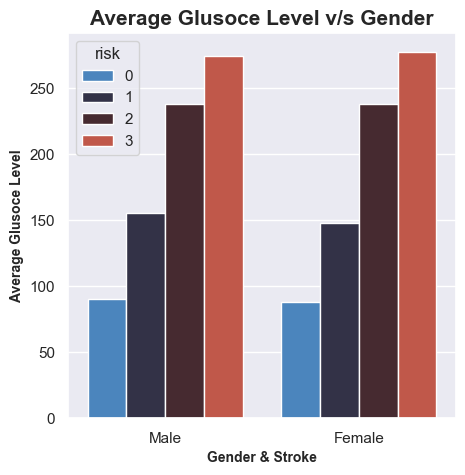

In [13]:
#Getting average glucose levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.glucose,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('Gender & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average Glusoce Level',fontsize=10, fontweight='bold')
plt.title('Average Glusoce Level v/s Gender',fontsize=15, fontweight='bold')


plt.show()  

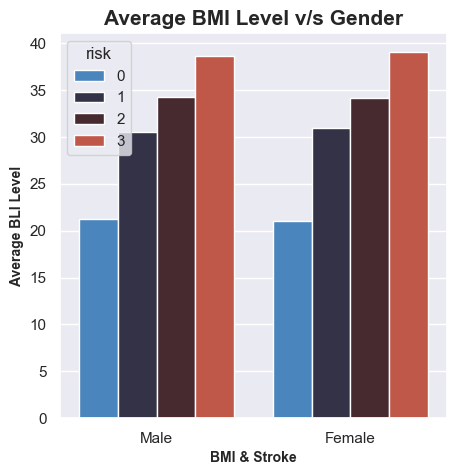

In [14]:
#Getting average BMI levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.bmi,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('BMI & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average BLI Level',fontsize=10, fontweight='bold')
plt.title('Average BMI Level v/s Gender',fontsize=15, fontweight='bold')


plt.show()  

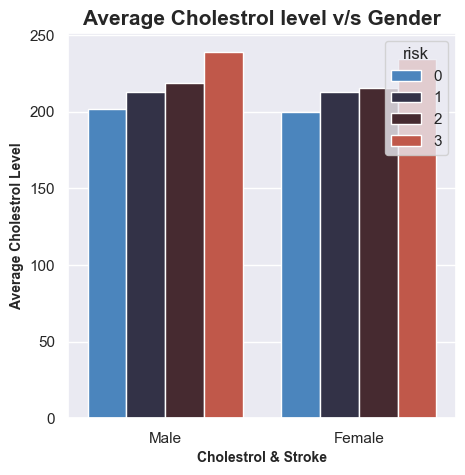

In [15]:
#Getting average Cholestrol levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.cholestrol,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('Cholestrol & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average Cholestrol Level',fontsize=10, fontweight='bold')
plt.title('Average Cholestrol level v/s Gender',fontsize=15, fontweight='bold')


plt.show()  

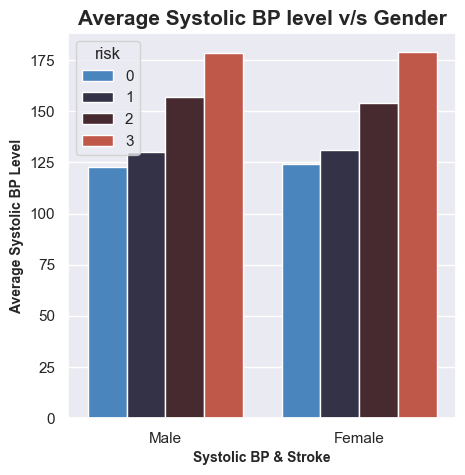

In [16]:
#Getting average Systolic blood pressure levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.systolic,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('Systolic BP & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average Systolic BP Level',fontsize=10, fontweight='bold')
plt.title('Average Systolic BP level v/s Gender',fontsize=15, fontweight='bold')

plt.show()  

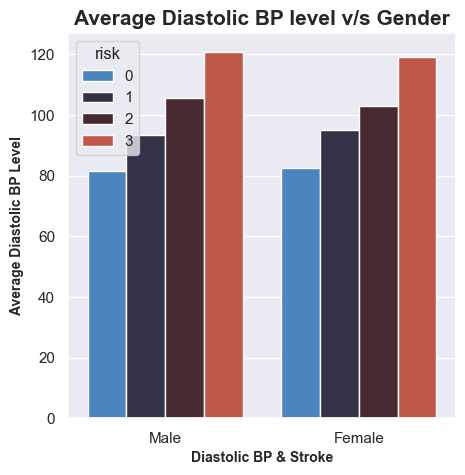

In [17]:
#Getting average Diastolic blood pressure levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.diastolic,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('Diastolic BP & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average Diastolic BP Level',fontsize=10, fontweight='bold')
plt.title('Average Diastolic BP level v/s Gender',fontsize=15, fontweight='bold')

plt.show()  

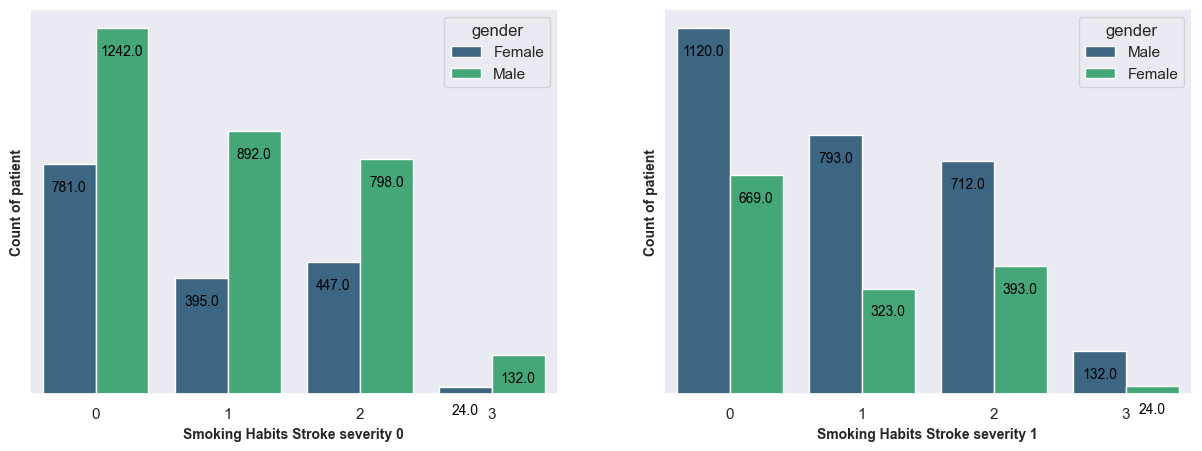

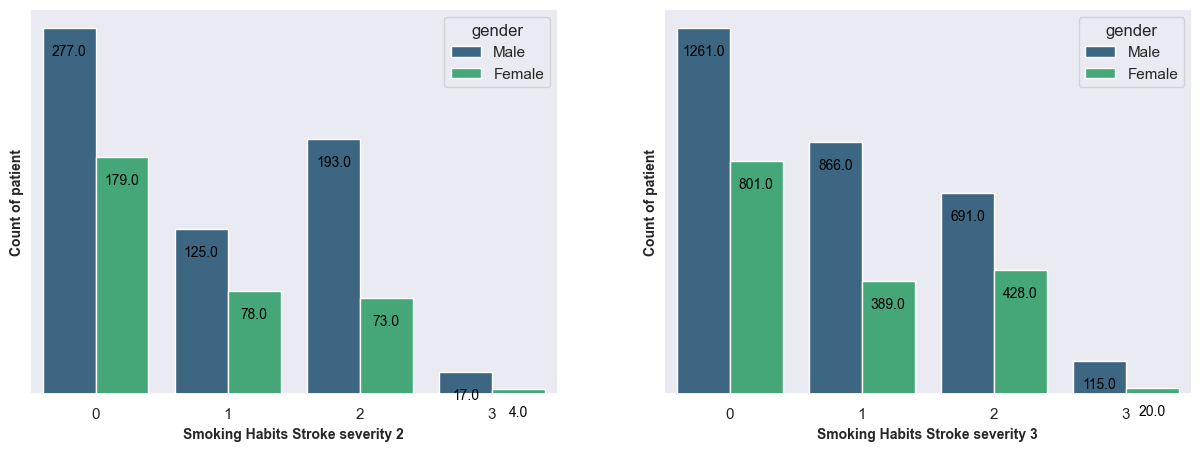

In [18]:
#Smoking habits of male and females vs stroke severity
fig13, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig14, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x=stroke_0.smoking,hue=stroke_0.gender, palette='viridis',ax=ax1)
ax1.set_xlabel('Smoking Habits Stroke severity 0',fontsize=10, fontweight='bold')
ax1.set_yticks([])
ax1.set_ylabel('Patients',fontsize=10, fontweight='bold')
ax1.set_ylabel('Count of patient')
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)


sns.countplot(x=stroke_1.smoking,hue=stroke_1.gender, palette='viridis',ax=ax2)
ax2.set_xlabel('Smoking Habits Stroke severity 1',fontsize=10, fontweight='bold')
ax2.set_yticks([])
ax2.set_ylabel('Patients',fontsize=10, fontweight='bold')
ax2.set_ylabel('Count of patient')
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)

sns.countplot(x=stroke_2.smoking,hue=stroke_2.gender, palette='viridis',ax=ax3)
ax3.set_xlabel('Smoking Habits Stroke severity 2',fontsize=10, fontweight='bold')
ax3.set_yticks([])
ax3.set_ylabel('Patients',fontsize=10, fontweight='bold')
ax3.set_ylabel('Count of patient')
for p in ax3.patches:
    ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)


sns.countplot(x=stroke_3.smoking,hue=stroke_3.gender, palette='viridis',ax=ax4)
ax4.set_xlabel('Smoking Habits Stroke severity 3',fontsize=10, fontweight='bold')
ax4.set_yticks([])
ax4.set_ylabel('Patients',fontsize=10, fontweight='bold')
ax4.set_ylabel('Count of patient')
for p in ax4.patches:
    ax4.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)




<AxesSubplot: >

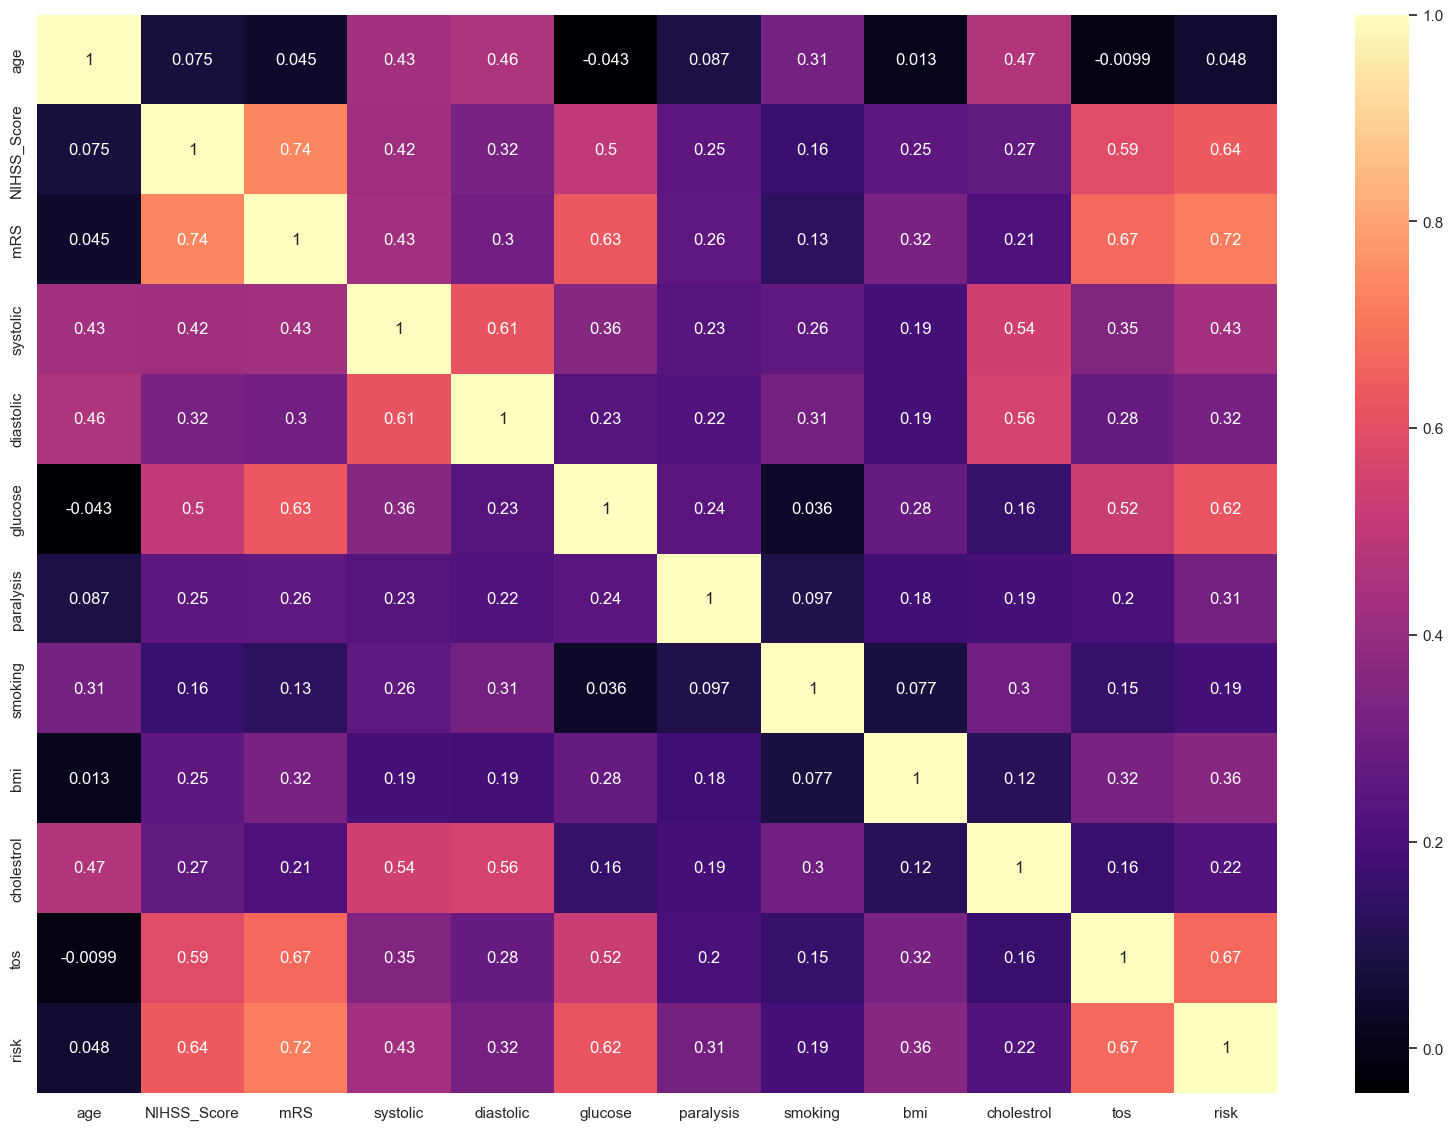

In [19]:
#Getting correlation of variables
fig15,ax1 = plt.subplots(figsize=(20,14))
sns.heatmap(df.corr(), annot = True, cmap='magma',ax=ax1)

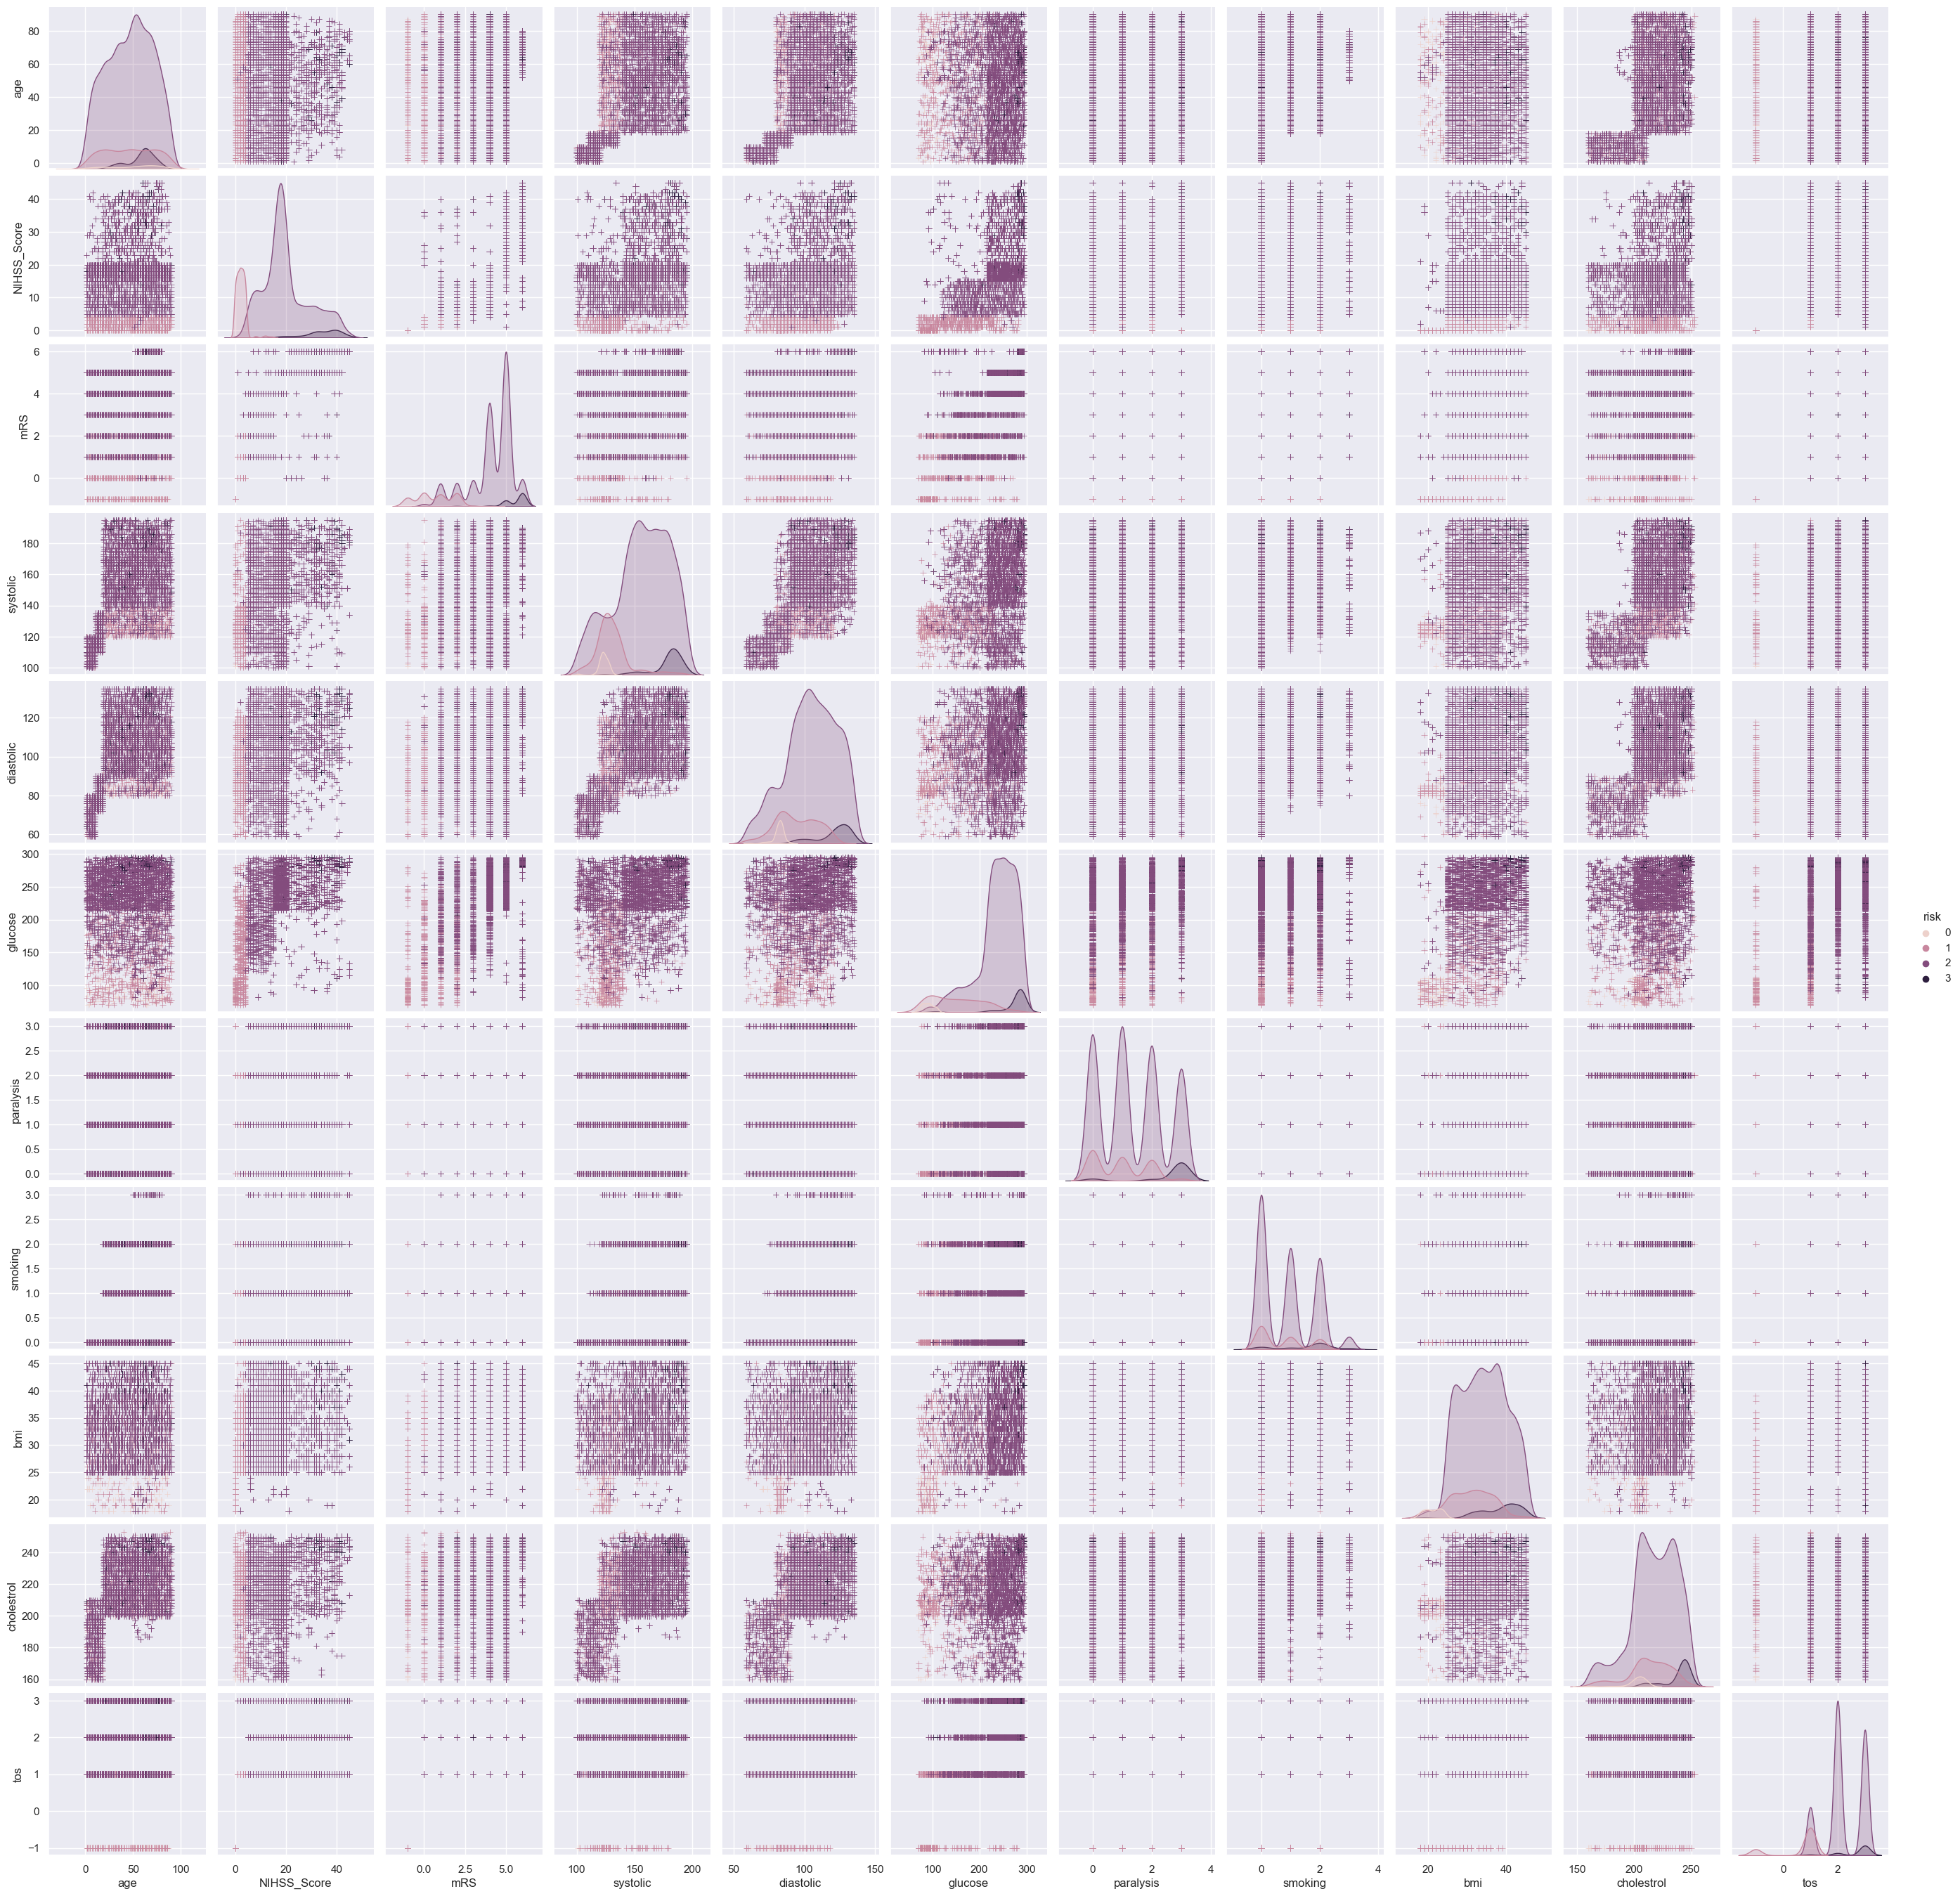

In [20]:

#Pair plots visualization

g = sns.pairplot(df, hue='risk', markers='+')

plt.show()

# Preprocessing

One Hot Encoding ---> 'gender' into Male and Female 
                       Dropping 'gender' column

In [21]:
m = {"Male": 1, "Female": 0}
f = {"Male": 0, "Female": 1}
df.insert(1, "Female", df['gender'].map(f), True)
df.insert(1, "Male", df['gender'].map(m), True)
# dropping gender column
df.drop(['gender'], axis=1, inplace=True)
print(df)

      age  Male  Female  NIHSS_Score  mRS  systolic  diastolic  glucose  \
0      61     1       0            0   -1       124         80       77   
1      75     1       0            0   -1       123         82       79   
2      73     1       0            0   -1       121         83       83   
3      63     0       1            0   -1       120         85      105   
4      23     1       0            0   -1       126         81       89   
...   ...   ...     ...          ...  ...       ...        ...      ...   
4793   67     1       0           13    6       180         83      198   
4794   67     0       1           20    3       180         88      188   
4795   65     1       0            6    4       126        111      227   
4796   64     1       0           19    5       126         82      262   
4797   65     1       0            5    1       169        115      263   

      paralysis  smoking  bmi  cholestrol  tos  risk  
0             0        0   22         200   

In [22]:
zero = df[df['risk']==0]
one = df[df['risk']==1]
two = df[df['risk']==2]
three = df[df['risk']==3]
print("Risk 0:", zero.shape[0])
print("Risk 1:", one.shape[0])
print("Risk 2:", two.shape[0])
print("Risk 3:", three.shape[0])

y = df.values[:, -1].reshape(df.values.shape[0], 1)
X = df.values[:, :-1]

Risk 0: 87
Risk 1: 632
Risk 2: 3852
Risk 3: 227


# MinMax Scaling

In [23]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0.6741573  1.         0.         ... 0.14814815 0.43010753 0.        ]
 [0.83146067 1.         0.         ... 0.07407407 0.51612903 0.        ]
 [0.80898876 1.         0.         ... 0.07407407 0.51612903 0.        ]
 ...
 [0.71910112 1.         0.         ... 0.18518519 0.78494624 1.        ]
 [0.70786517 1.         0.         ... 0.37037037 0.90322581 0.5       ]
 [0.71910112 1.         0.         ... 0.33333333 0.76344086 1.        ]]


## OverSampling

In [24]:
smk = SMOTETomek(random_state=42)
X, y = smk.fit_resample(X, y)
print(X)
print("After Oversampling:")
print("Risk", Counter(y))

[[0.6741573  1.         0.         ... 0.14814815 0.43010753 0.        ]
 [0.83146067 1.         0.         ... 0.07407407 0.51612903 0.        ]
 [0.80898876 1.         0.         ... 0.07407407 0.51612903 0.        ]
 ...
 [0.57303371 1.         0.         ... 0.91952751 0.61886899 1.        ]
 [0.69662921 0.         1.         ... 0.96296296 0.88172043 1.        ]
 [0.7752809  1.         0.         ... 0.74074074 0.91397849 1.        ]]
After Oversampling:
Risk Counter({0: 3851, 3: 3851, 1: 3850, 2: 3850})


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)





## Random Forest

In [26]:
# seeing the feature importance variable
model = RandomForestClassifier(n_estimators = 100)
feature_names=df.columns[:-1]
# Train the model using the training sets
model.fit(x_train, y_train)
feature_imp = pd.Series(model.feature_importances_,index=feature_names ).sort_values(ascending = False)
feature_imp

NIHSS_Score    0.207809
mRS            0.140095
tos            0.127943
glucose        0.126015
bmi            0.122664
paralysis      0.075044
systolic       0.062132
cholestrol     0.046132
diastolic      0.039386
age            0.024594
smoking        0.023776
Male           0.002312
Female         0.002098
dtype: float64

### Training the model

### Finding best parameters using GridSearchCV

In [27]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'criterion':['gini','entropy'],
              'random_state':[23],
              'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, None]}

GS_RF=GridSearchCV(RandomForestClassifier(), param_grid)
GS_RF.fit(x_train,y_train.ravel())
print(GS_RF.best_params_)
print(GS_RF.score(x_test,y_test))

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 40, 'random_state': 23}
0.9847452125933138


accuracy 0.9818240830899059
Confusion matrix
[[795   0   0   0]
 [ 37 752   4   0]
 [  0   0 707   9]
 [  0   0   6 771]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       795
           1       1.00      0.95      0.97       793
           2       0.99      0.99      0.99       716
           3       0.99      0.99      0.99       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081

score 0.9818240830899059
precision 0.9825108458051711
recall 0.9820014409777666
F! Score 0.9819571832091596


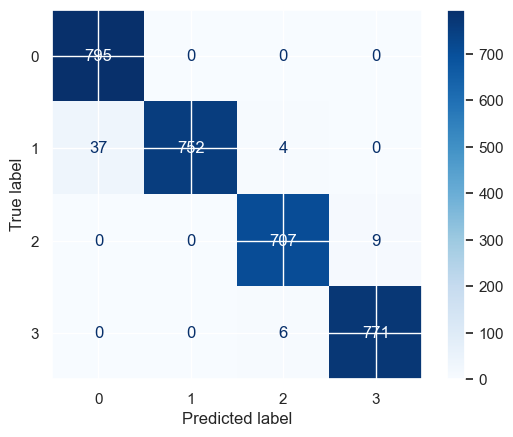

In [28]:
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print("Confusion matrix")
  print(cm)
  print(classification_report(y_test, y_pred))
  report = classification_report(y_test, y_pred,output_dict=True )
  return report

model=RandomForestClassifier(bootstrap=True, criterion= 'entropy', max_depth= 20, random_state= 23)
model.fit(x_train, y_train.ravel())
yhat = model.predict(x_test)
report=performance(y_test,yhat)
sklearn.metrics.plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)
print("score",model.score(x_test,y_test))
print("precision",sklearn.metrics.precision_score(y_test,yhat,average="macro"))
print("recall",sklearn.metrics.recall_score(y_test,yhat,average="macro"))
print("F! Score",sklearn.metrics.f1_score(y_test,yhat,average="macro"))


## Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [30]:
 # Model Accuracy, how often is the classifier correct?
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Performance function : takes y_test and y_pred arrays and prints classification report, confusion matrix
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print(cm)
  print(classification_report(y_test, y_pred))
  from sklearn.metrics import cohen_kappa_score
  print("Cohen Kappa Score",cohen_kappa_score(y_test, y_pred))
performance(y_test, y_pred)

accuracy 0.9766309639727361
[[789   6   0   0]
 [ 30 759   4   0]
 [  0   6 701   9]
 [  0   0  17 760]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       795
           1       0.98      0.96      0.97       793
           2       0.97      0.98      0.97       716
           3       0.99      0.98      0.98       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081

Cohen Kappa Score 0.9688245019245072


In [31]:
#Performing GridsearCV on Decision tree to find best parameters
param_grid = {'criterion':['gini','entropy'],
              'random_state':[1,2,3],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_leaf_nodes':[None, 1,2,5,10,15,20,30],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, None]}

GS_DT=GridSearchCV(DecisionTreeClassifier(), param_grid)
GS_DT.fit(x_train,y_train.ravel())
print(GS_DT.best_params_)
print(GS_DT.score(x_test,y_test))


{'criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'max_leaf_nodes': None, 'random_state': 1}
0.9756572541382668


# SVM


In [32]:
#importing necessary libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Performance function : takes y_test and y_pred arrays and prints classification report, confusion matrix
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print(cm)
  print(classification_report(y_test, y_pred))
  from sklearn.metrics import cohen_kappa_score
  print("Cohen Kappa Score",cohen_kappa_score(y_test, y_pred))


In [33]:
#Linear kernel SVM
from sklearn import svm
#Making pipeline
SVM_object = make_pipeline(svm.SVC(kernel='poly'))
#Fitting training data
SVM_object.fit(x_train,y_train)
y_pred=SVM_object.predict(x_test)
#Calling performance function
performance(y_test, y_pred)

accuracy 0.9470950989938332
[[795   0   0   0]
 [ 85 697  11   0]
 [  0  16 652  48]
 [  0   0   3 774]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       795
           1       0.98      0.88      0.93       793
           2       0.98      0.91      0.94       716
           3       0.94      1.00      0.97       777

    accuracy                           0.95      3081
   macro avg       0.95      0.95      0.95      3081
weighted avg       0.95      0.95      0.95      3081

Cohen Kappa Score 0.9293865496663246


<AxesSubplot: >

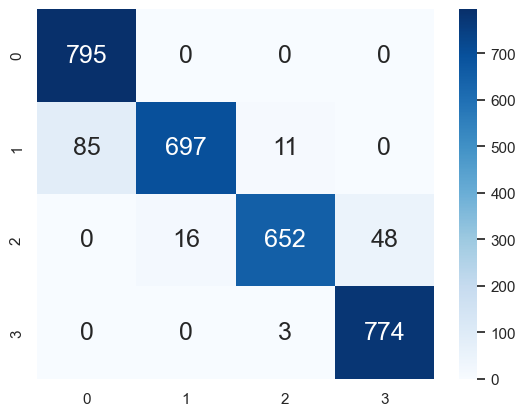

In [34]:
#Plotting using seaborn
import seaborn as sns
comf=confusion_matrix(y_test, y_pred)
sns.heatmap(comf, cmap="Blues", annot=True,annot_kws={"size": 18}, fmt='g')

In [35]:
#Best kernel Performance using Grid Search
param_grid = {'kernel':['linear','poly','sigmoid','rbf'],'gamma':['scale','auto'],'random_state':[1,2,3]}
GS_SVM=GridSearchCV(svm.SVC(), param_grid,cv=5)
GS_SVM.fit(x_train,y_train)
GS_SVM.best_params_

{'gamma': 'scale', 'kernel': 'poly', 'random_state': 1}

In [36]:
GS_SVM.score(x_test,y_test)

0.9470950989938332

In [37]:
#Error vs Kernel plot
dt_train_score=[]
dt_test_score=[]
for i in ['linear','poly','sigmoid','rbf']:
  param_grid = {'kernel':[i],'gamma':['scale','auto'],'random_state':[1,2,3]}
  GS_SVM=GridSearchCV(svm.SVC(), param_grid,cv=5)
  GS_SVM.fit(x_train,y_train)
  y_train_pred=GS_SVM.predict(x_train)
  y_pred=GS_SVM.predict(x_test)
  dt_train_score.append(accuracy_score(y_train,y_train_pred))
  dt_test_score.append(accuracy_score(y_test,y_pred))


[]

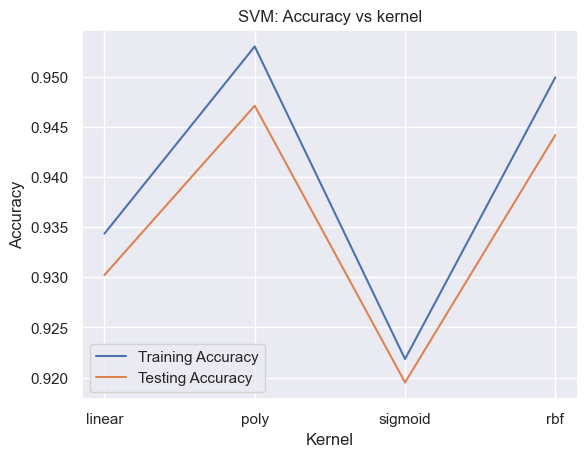

In [38]:
#Accuracy vs kernel
plt.title("SVM: Accuracy vs kernel")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(['linear','poly','sigmoid','rbf'],dt_train_score,label="Training Accuracy")
plt.plot(['linear','poly','sigmoid','rbf'],dt_test_score,label="Testing Accuracy")
plt.legend()
plt.plot()

# Feature importance

Found above using RF classifier

NIHSS_Score    0.232721
tos            0.126347
bmi            0.126228
mRS            0.116398
glucose        0.097961
systolic       0.080692
paralysis      0.066406
cholestrol     0.059491
diastolic      0.044202
age            0.023455
smoking        0.021836
Male           0.002139
Female         0.002124

Text(0.5, 1.0, 'Feature importance')

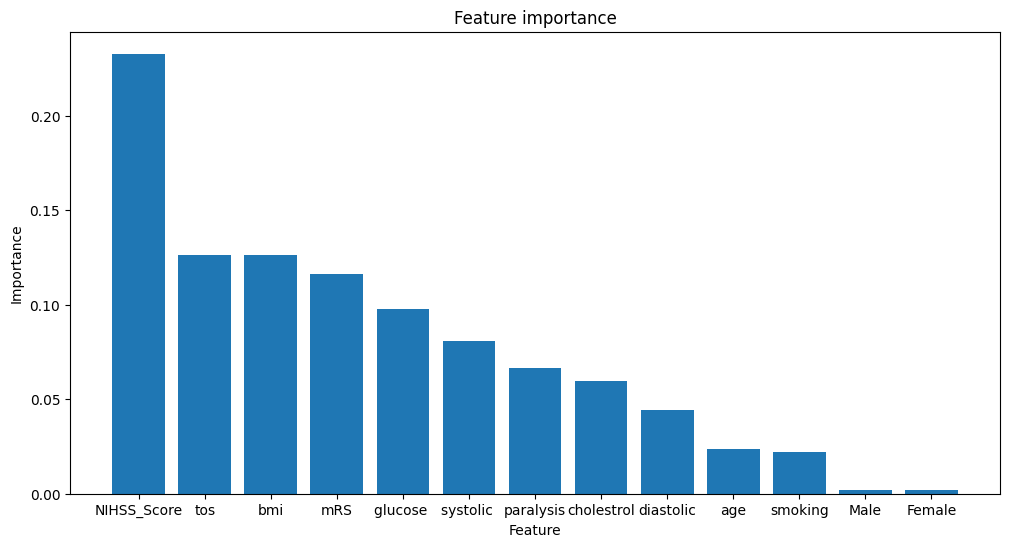

In [3]:
x = ["NIHSS_Score", "tos", "bmi", "mRS", "glucose ", "systolic ", "paralysis", "cholestrol", "diastolic", "age", "smoking", "Male" ,"Female"]
y = [0.232721, 0.126347, 0.126228, 0.116398, 0.097961, 0.080692, 0.066406, 0.059491 , 0.044202, 0.023455,0.021836,0.002139,0.002124]
plt.figure(figsize = (12,6))
plt.bar(x,y)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importance")